In [24]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import shutil


- Changes: 
- Increase batch size from 16 to 32

In [25]:
filepath = 'David/Tests/11 - 50epochNormalizationNoNegatives'
script_dir = os.path.dirname('lstm.ipynb')
results_dir = os.path.join(script_dir, filepath + '/')

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

In [26]:
# Load Data

# Uncomment to save .npy file if not yet saved
#data =  np.loadtxt('./test_series.csv',delimiter=',',dtype=np.float32)
#np.save('test_series', data)
xy = np.load('./coin_data.npy')

X = xy[:,1:] # Indexes inputs

# Turns negative values to 0
X[X < 0] = 0

y = xy[:,0] # Indexes Labels
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)
#print(type(y[0]))

In [27]:
print(f'XY Shape: {xy.shape}')
print(f'xy[0]: {xy[0]}')
print(f'X[0]: {X[0]}')
print(f'y[0]: {y[0]}')

coin_1 = 0
coin_2 = 0
coin_5 = 0
coin_20 = 0
coin_50 = 0
coin_100 = 0
coin_200 = 0
for i in range(xy.shape[0]):
    if xy[i,0] == 0:
        coin_1 += 1
    elif xy[i,0] == 1:
        coin_2 += 1
    elif xy[i,0] == 2:
        coin_5 += 1
    elif xy[i,0] == 3:
        coin_20 += 1
    elif xy[i,0] == 4:
        coin_50 += 1
    elif xy[i,0] == 5:
        coin_100 += 1
    elif xy[i,0] == 6:
        coin_200 += 1
print(f'coin 1: {coin_1}')
print(f'coin 2: {coin_2}')
print(f'coin 5: {coin_5}')
print(f'coin 20: {coin_20}')
print(f'coin 50: {coin_50}')
print(f'coin 100: {coin_100}')
print(f'coin 200: {coin_200}')

XY Shape: (1094, 769025)
xy[0]: [   5.    0.    0. ... 1040.  912.  640.]
X[0]: [   0.    0.    0. ... 1040.  912.  640.]
y[0]: 5.0
coin 1: 151
coin 2: 170
coin 5: 130
coin 20: 137
coin 50: 130
coin 100: 180
coin 200: 196


In [28]:
# Handle Class Imbalance
#class_counts = torch.tensor([count_coin_1, count_coin_2, ..., count_coin_N], dtype=torch.float32)
#class_weights = 1.0 / class_counts  # Inverse frequency
#class_weights /= class_weights.sum()  # Normalize if necessary
#class_weights = class_weights.to(device)
#criterion = nn.CrossEntropyLoss(weight=class_weights)

In [29]:
# Set random seed for reproducibility
torch.manual_seed(7)  # Set the seed for generating random numbers in PyTorch
np.random.seed(7)     # Set the seed for generating random numbers in NumPy

In [30]:
# Define Hyper Parameters

hidden_size = 128
num_classes = 7
num_epochs = 50
batch_size = 32
learning_rate = 0.0001
num_layers = 2

input_size = 512 
sequence_length = 1502  
#input_size = 4 
#sequence_length = 28     



In [31]:

# Device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Before normalization X_train[0]: [0. 0. 0. ... 0. 0. 0.]


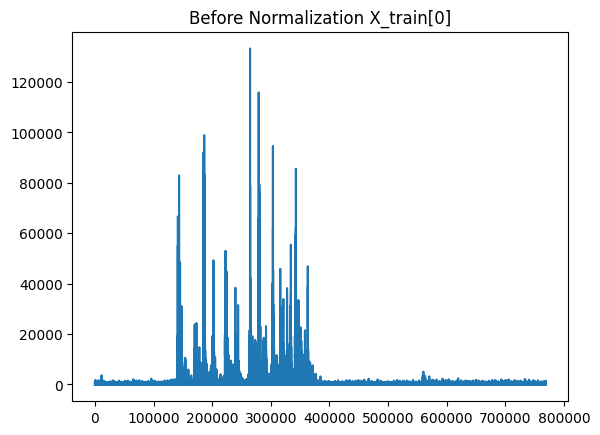

After normalization X_train[0]: [0. 0. 0. ... 0. 0. 0.]


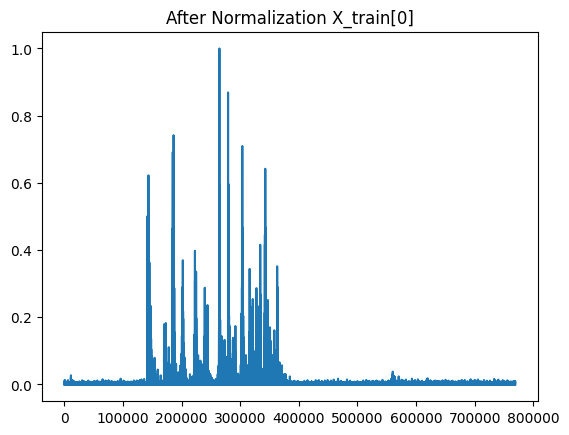

In [32]:
# Random State So it is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Graph before normalization
print(f'Before normalization X_train[0]: {X_train[0]}')
plt.figure()
plt.title("Before Normalization X_train[0]")
plt.plot(X_train[0])
plt.show()

# Scale and split data
sc = MinMaxScaler(feature_range=(0,1))

# Per sample scaling
#X_train = np.array([sc.fit_transform(sample.reshape(-1, 1)).flatten() for sample in X_train])
#X_test = np.array([sc.fit_transform(sample.reshape(-1, 1)).flatten() for sample in X_test])

# Graph after scaling
#print(f'After normalization X_train[0]: {X_train[0]}')
#plt.figure()
#plt.title("After Per Sample Normalization X_train[0]")
#plt.plot(X_train[0])
#plt.show()

# Global scaling
# sc.fit_transform on X_train and sc.transform on X_test to avoid data leakage
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Graph after scaling
print(f'After normalization X_train[0]: {X_train[0]}')
plt.figure()
plt.title("After Normalization X_train[0]")
plt.plot(X_train[0])
plt.show()

In [33]:
print(f'X_train[0]: {X_train[0]}')
print(f'y_train[0]: {y_train[0]}')
print(f'X_test[0]: {X_test[0]}')
print(f'y_test[0]: {y_test[0]}')

train_coin_1 = 0
train_coin_2 = 0
train_coin_5 = 0
train_coin_20 = 0
train_coin_50 = 0
train_coin_100 = 0
train_coin_200 = 0

for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        train_coin_1 += 1
    elif y_train[i] == 1:
        train_coin_2 += 1
    elif y_train[i] == 2:
        train_coin_5 += 1
    elif y_train[i] == 3:
        train_coin_20 += 1
    elif y_train[i] == 4:
        train_coin_50 += 1
    elif y_train[i] == 5:
        train_coin_100 += 1
    elif y_train[i] == 6:
        train_coin_200 += 1
        
print(f'coin 1: {train_coin_1}')
print(f'coin 2: {train_coin_2}')
print(f'coin 5: {train_coin_5}')
print(f'coin 20: {train_coin_20}')
print(f'coin 50: {train_coin_50}')
print(f'coin 100: {train_coin_100}')
print(f'coin 200: {train_coin_200}')

test_coin_1 = 0
test_coin_2 = 0
test_coin_5 = 0
test_coin_20 = 0
test_coin_50 = 0
test_coin_100 = 0
test_coin_200 = 0
for i in range(y_test.shape[0]):
    if y_test[i] == 0:
        test_coin_1 += 1
    elif y_test[i] == 1:
        test_coin_2 += 1
    elif y_test[i] == 2:
        test_coin_5 += 1
    elif y_test[i] == 3:
        test_coin_20 += 1
    elif y_test[i] == 4:
        test_coin_50 += 1
    elif y_test[i] == 5:
        test_coin_100 += 1
    elif y_test[i] == 6:
        test_coin_200 += 1
print(f'coin 1: {test_coin_1}')
print(f'coin 2: {test_coin_2}')
print(f'coin 5: {test_coin_5}')
print(f'coin 20: {test_coin_20}')
print(f'coin 50: {test_coin_50}')
print(f'coin 100: {test_coin_100}')
print(f'coin 200: {test_coin_200}')

X_train[0]: [0. 0. 0. ... 0. 0. 0.]
y_train[0]: 6.0
X_test[0]: [1.9083970e-04 1.1450381e-04 0.0000000e+00 ... 3.4351143e-04 3.8167938e-05
 2.2900762e-04]
y_test[0]: 4.0
coin 1: 118
coin 2: 138
coin 5: 104
coin 20: 112
coin 50: 100
coin 100: 146
coin 200: 157
coin 1: 33
coin 2: 32
coin 5: 26
coin 20: 25
coin 50: 30
coin 100: 34
coin 200: 39


In [34]:
# Creates TrainCoinDataSet
class TrainCoinDataSet(Dataset):

    def __init__(self, X_train, y_train):
        # Data Loading
        self.x = torch.from_numpy(X_train.astype(np.float32))
        self.y = torch.from_numpy(y_train).type(torch.LongTensor)
        self.n_samples = y_train.shape[0] # n_samples
        print(self.n_samples)

    def __getitem__(self, index):
        # Allows indexing
        return self.x[index], self.y[index]

    def __len__(self):
        # Allows calling length
        return self.n_samples
    
class TestCoinDataSet(Dataset):

    def __init__(self, X_test, y_test):
        # Data Loading
        self.x = torch.from_numpy(X_test.astype(np.float32))
        self.y = torch.from_numpy(y_test).type(torch.LongTensor)
        self.n_samples = y_test.shape[0] # n_samples
        print(self.n_samples)

    def __getitem__(self, index):
        # Allows indexing
        return self.x[index], self.y[index]

    def __len__(self):
        # Allows calling length
        return self.n_samples

In [35]:
# Creates Dataset
train_data = TrainCoinDataSet(X_train, y_train)
test_data = TestCoinDataSet(X_test, y_test)

875
219


In [36]:
print(train_data[0])
print(test_data[0])

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(6))
(tensor([1.9084e-04, 1.1450e-04, 0.0000e+00,  ..., 3.4351e-04, 3.8168e-05,
        2.2901e-04]), tensor(4))


In [37]:
# Defines Train and Test Datasets sizes
#train_size = int(0.8 * len(dataset))  # 80% of the data will be used for training
#test_size = len(dataset) - train_size  # Remaining 20% will be used for test

# Split dataset into training set and test set
#train_data, test_data = random_split(dataset, [train_size, test_size])

# Creates Dataloaders for train and test datasets
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)


In [38]:
print(f'Input shape: {samples.shape} , Labels shape: {labels.shape}')
print(f"Input range after standardization: Min = {samples[0].min()}, Max = {samples[0].max()}")
print(samples[0])
print(labels[0])
print(f'Input dtype: {samples[0,0].dtype}')
print(f'Label dtype: {labels[0].dtype}')
print(f'Labels: {labels}')

Input shape: torch.Size([32, 769024]) , Labels shape: torch.Size([32])
Input range after standardization: Min = 0.0, Max = 0.9999999403953552
tensor([0.0000, 0.0000, 0.0004,  ..., 0.0000, 0.0000, 0.0000])
tensor(5)
Input dtype: torch.float32
Label dtype: torch.int64
Labels: tensor([5, 3, 4, 2, 2, 2, 1, 1, 3, 0, 3, 5, 5, 1, 6, 6, 5, 6, 6, 3, 2, 3, 4, 3,
        0, 4, 2, 5, 3, 6, 2, 1])


In [39]:
# Create Model

# Model 
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        # x -> (batch_size, seq, input_size)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(p=0.5)  # Inside LSTM clas

    def forward(self,x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0,c0))

        # Dropout on output of LSTM
        out = self.dropout(out)

        # out: batch_size, seq_length, hidden_size
        # out (N, 6008, 128)
        # : all samples in batch, -1 last time step, : all features in hidden size

        out = out[:, -1, :] 
        
        # out (N, 128)
        out = self.fc(out)
        return out

In [40]:
model = LSTM(input_size, hidden_size, num_layers, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Learning Rate Scheduler (Reduce by factor of 0.1 every 10 epochs)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Reduces learning rate if loss plateaus
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

In [41]:
print(model)

LSTM(
  (lstm): LSTM(512, 128, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=128, out_features=7, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [42]:
# Training loop

history = {'train_loss': [], 'val_loss': [], 'train_acc':[], 'val_acc': []}
all_preds = []
all_labels = []

train_loss_steps = []
train_acc_steps = []
running_loss_train_steps = 0.0
n_correct_train_steps = 0
n_samples_train_steps = 0

plot_steps, print_steps = 5,1

running_loss_train = 0.0
n_correct_train = 0
n_samples_train = 0

running_loss_val = 0.0
n_correct_val = 0
n_samples_val = 0

for epoch in range(num_epochs):
    
    model.train()
    running_loss_train = 0.0
    n_correct_train = 0
    n_samples_train = 0

    # Training loop
    for i, (inputs, labels) in enumerate(train_loader):
        
        inputs = inputs.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # For Epoch Graph
        running_loss_train += loss.item()
        _, predictions = torch.max(outputs, 1)
        n_correct_train += (predictions == labels).sum().item()
        n_samples_train += labels.shape[0]

        # For Steps Graph
        running_loss_train_steps += loss.item()
        _, predictions = torch.max(outputs, 1)
        n_correct_train_steps += (predictions == labels).sum().item()
        n_samples_train_steps += labels.shape[0]
        
        if (i+1) % print_steps == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{len(train_loader)}, loss = {loss.item():.4f}')

        if (i+1) % plot_steps == 0:
            train_loss_steps.append(running_loss_train_steps / len(train_loader))
            train_acc_steps.append(100 * n_correct_train_steps / n_samples_train_steps)
            running_loss_train_steps = 0.0
            n_correct_train_steps = 0
            n_samples_train_steps = 0


    history['train_loss'].append(running_loss_train / len(train_loader))
    history['train_acc'].append(100 * n_correct_train / n_samples_train)

    # Test loop

    running_loss_val = 0.0
    n_correct_val = 0
    n_samples_val = 0

    model.eval()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            
            inputs = inputs.reshape(-1, sequence_length, input_size).to(device)
            labels = labels.to(device)
            
            # Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Accumulate loss
            running_loss_val += loss.item()
            _, predictions = torch.max(outputs, 1)
            n_correct_val += (predictions == labels).sum().item()
            n_samples_val += labels.shape[0]

            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            if (i+1) % print_steps == 0:
                print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{len(test_loader)}, loss = {loss.item():.4f}')

        history['val_loss'].append(running_loss_val / len(test_loader))
        history['val_acc'].append(100 * n_correct_val / n_samples_val)

epoch 1 / 50, step 1/28, loss = 1.9416
epoch 1 / 50, step 2/28, loss = 1.9739
epoch 1 / 50, step 3/28, loss = 1.9322
epoch 1 / 50, step 4/28, loss = 1.9553
epoch 1 / 50, step 5/28, loss = 1.9577
epoch 1 / 50, step 6/28, loss = 1.9447
epoch 1 / 50, step 7/28, loss = 1.9324
epoch 1 / 50, step 8/28, loss = 1.9499
epoch 1 / 50, step 9/28, loss = 1.9484
epoch 1 / 50, step 10/28, loss = 1.9501
epoch 1 / 50, step 11/28, loss = 1.9609
epoch 1 / 50, step 12/28, loss = 1.9324
epoch 1 / 50, step 13/28, loss = 1.9468
epoch 1 / 50, step 14/28, loss = 1.9377
epoch 1 / 50, step 15/28, loss = 1.9492
epoch 1 / 50, step 16/28, loss = 1.9505
epoch 1 / 50, step 17/28, loss = 1.9694
epoch 1 / 50, step 18/28, loss = 1.9664
epoch 1 / 50, step 19/28, loss = 1.9687
epoch 1 / 50, step 20/28, loss = 1.9420
epoch 1 / 50, step 21/28, loss = 1.9527
epoch 1 / 50, step 22/28, loss = 1.9655
epoch 1 / 50, step 23/28, loss = 1.9495
epoch 1 / 50, step 24/28, loss = 1.9452
epoch 1 / 50, step 25/28, loss = 1.9255
epoch 1 /

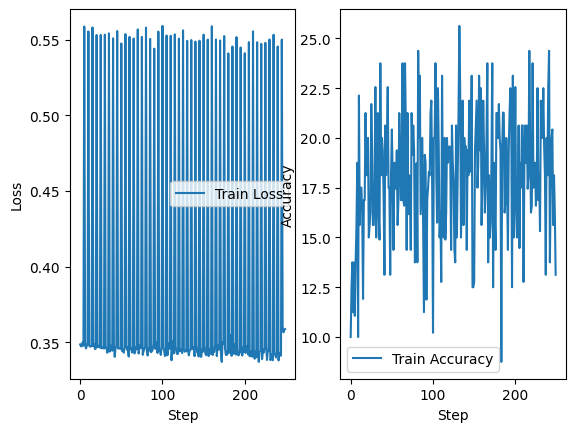

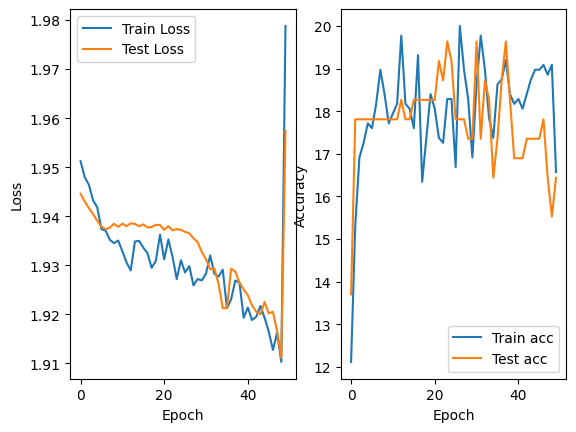

In [43]:
fig , ax = plt.subplots(1,2,sharex=True)

ax [0].plot(train_loss_steps, label='Train Loss')
ax [0].set_xlabel('Step')
ax [0].set_ylabel('Loss')
ax [0].legend()

ax [1].plot(train_acc_steps, label='Train Accuracy')
ax [1].set_xlabel('Step')
ax [1].set_ylabel('Accuracy')
ax [1].legend()

plt.savefig(results_dir + '/StepGraph.png')
plt.show() 

fig , ax = plt.subplots(1,2,sharex=True)

ax [0].plot(history['train_loss'], label='Train Loss')
ax [0].plot(history['val_loss'], label='Test Loss')
ax [0].set_xlabel('Epoch')
ax [0].set_ylabel('Loss')
ax [0].legend()

ax [1].plot(history['train_acc'], label='Train acc')
ax [1].plot(history['val_acc'], label='Test acc')
ax [1].set_xlabel('Epoch')
ax [1].set_ylabel('Accuracy')
ax [1].legend()

plt.savefig(results_dir + '/EpochGraph.png')
plt.show() 

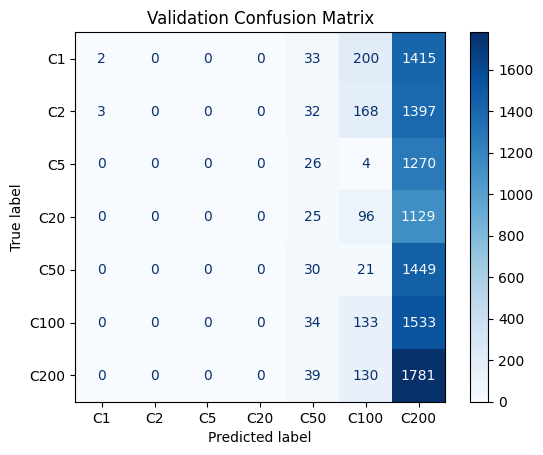

In [44]:
"""
Plot a confusion matrix using true and predicted labels.

Parameters:
    all_labels: List of true labels.
    all_preds: List of predicted labels.
    class_names: List of class names for labeling the confusion matrix.
"""
class_names = ['C1','C2','C5','C20','C50','C100','C200']
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Validation Confusion Matrix")
disp.figure_.savefig(results_dir + 'Confusion_Matrix.png')
plt.show()


In [45]:
print(f"after {num_epochs} epochs the trainning accuracy is {history["train_acc"][-1]} and the test accuaracy is {history["val_acc"][-1]} ")

test_accuracy_max= max(history["val_acc"])
train_accuracy_max=max(history["train_acc"])

idx_max_test_accuracy=history["val_acc"].index(test_accuracy_max)

idx_max_train_accuracy=history["train_acc"].index(train_accuracy_max)

print(f" the maximum accuracy of the test was {max(history["val_acc"])} at the epoch {idx_max_test_accuracy}")

print(f" the maximum accuracy of the train was {max(history["train_acc"])} at the epoch {idx_max_train_accuracy}")

print(f"the accuracy of the training at the best validation accuracy {max(history["val_acc"])} is {history["train_acc"][idx_max_test_accuracy]}  ")

after 50 epochs the trainning accuracy is 16.571428571428573 and the test accuaracy is 16.438356164383563 
 the maximum accuracy of the test was 19.634703196347033 at the epoch 23
 the maximum accuracy of the train was 20.0 at the epoch 26
the accuracy of the training at the best validation accuracy 19.634703196347033 is 18.285714285714285  


In [46]:
# Copy the 
shutil.copyfile('./lstm.ipynb', './' + results_dir + 'lstm_copy.ipynb')

'./David/Tests/11 - 50epochNormalizationNoNegatives/lstm_copy.ipynb'